# Returns

## From Prices to Returns

In this lab we'll work the very basics of Returns - computing returns, and compounding a sequence of returns.

Let's start with a set of prices for a stock "A", in a python list:

In [108]:
prices_a = [8.70, 8.91, 8.71]

Recall that the return from time $t$ to time ${t+1} is given by:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternately

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$

If you come from R or another language that supports vectors, you might expect something like this to work:

```python
returns_a = prices_a[:-1]/prices_a[1:] - 1
```

However, since Python lists do not operate as vectors, that will not work, generating an error about "/" not working for lists.


In [109]:
# WILL NOT WORK - THIS WILL GENERATE AN ERROR!
# prices_a[1:]/prices_a[:-1] -1

Instead, we can convert them to a `numpy` array. Numpy arrays _do_ behave like vectors, so this works:

In [110]:
import numpy as np

prices_a = np.array([8.70, 8.91, 8.71])
prices_a

array([8.7 , 8.91, 8.71])

In [111]:
prices_a[1:]/prices_a[:-1] - 1

array([ 0.02413793, -0.02244669])

Now, let's add a few more days of prices and introduce a second stock. Let's call these two stocks "BLUE" and "ORANGE". Instead of using raw numpy arrays, we are going to use the far more powerful Pandas DataFrame, which wraps the functionality of numpy into a very convenient and easy to use data structure called a DataFrame. Note how the DtaFrame has two nicely indexed columns as well as a row index that by default runs from 0 to 4.

In [112]:
import pandas as pd

prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
                       "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]})

Note how we cannot compute returns for the first day, because we dont have the closing price for the previous day. In general, we lose one data point when we go from prices to returns.

Finally, there is a built-in method in DataFrame that computes the percent change from one row to another. Since that is exactly what a return is (the percent change in price) we can just use this method to compute the return.


In [122]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


## Reading data from a CSV file
Since typing in returns is tedious, let's read the data in from a file. Pandas provides a convenient and simple way to read in a CSV file of the returns.

In [123]:
prices = pd.read_csv('data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [124]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [125]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [126]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

<Axes: >

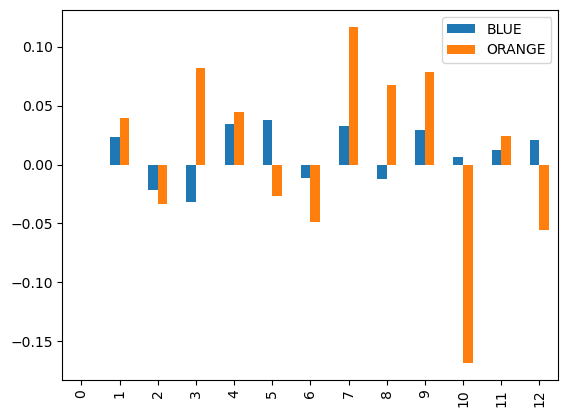

In [127]:
returns.plot.bar()

<Axes: >

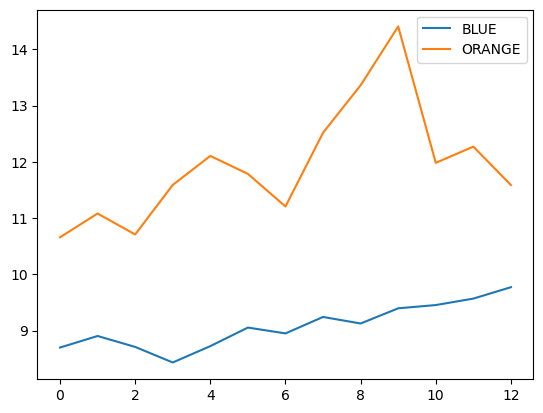

In [128]:
prices.plot()

## Compounding Returns

Now that we have a series of 12 monthly returns, we can produce the compounded return by multiplying the individual period returns, as long as the returns are expressed as growth rates in what I call "1+R" format.

To compound the returns, all we need to do is add 1 to each return and then multiply them. The result is itself in "1+R" format, so we need to subtract 1.

Let's compute the compounded return of our two series. 

In [129]:
returns + 1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [130]:
np.prod(returns+1)

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [131]:
(returns+1).prod()

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [132]:
(returns+1).prod()-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [133]:
(((returns+1).prod()-1)*100).round(2)

BLUE      12.33
ORANGE     8.72
dtype: float64

## Annualizing Returns

To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

And finally, to annualize a daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$

For example, to annualize a 1% monthly, and 4% quarterly and a 0.01% daily return you would do:

In [134]:
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

In [135]:
rq = 0.04
(1+rq)**4 - 1

0.1698585600000002

# Risk and Volatility

Volatility is measured by average squared deviation from the mean, which is the standard deviation.

In [136]:
import pandas as pd
prices = pd.read_csv("/Users/account/Downloads/Portfolio_contruction/data/sample_prices.csv")
returns = prices.pct_change()
returns.head()

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544


In [137]:
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [138]:
d = returns - returns.mean()
sd = d**2
n = len(returns)
msd = sd.sum()/(n-1)

import numpy as np
vol = np.sqrt(msd)
vol

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [139]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

## Annualizing Volatility

We annualize volatility by scaling it by square root of the number of periods per observation.

In [140]:
annualized_vol = returns.std()*(12**0.5)
annualized_vol


BLUE      0.083060
ORANGE    0.275747
dtype: float64

## Risk Adjusted Returns

Read in the monthly returns of a set of 10 portfolios formed on market caps, or market equities of the companies. Of the 10 portfolios, we only want to look at the largest cap and the smallest cap companies:

In [141]:
import pandas as pd
import numpy as np

me_m = pd.read_csv("/Users/account/Downloads/Portfolio_contruction/data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
me_m.head()

/var/folders/cs/9h7p_scd025gkjlttrkq99100000gn/T/ipykernel_8646/3604443193.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_m = pd.read_csv("/Users/account/Downloads/Portfolio_contruction/data/Portfolios_Formed_on_ME_monthly_EW.csv",


,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [142]:
col = ["Lo 20","Hi 20"]
returns = me_m.loc['1999':'2016',col]
returns

,Lo 20,Hi 20
199901,11.14,1.53
199902,-3.99,-1.72
199903,-3.08,3.68
199904,8.24,6.79
199905,4.35,-0.48
...,...,...
201508,-3.47,-5.59
201509,-6.10,-3.33
201510,3.85,7.10
201511,1.65,0.15


In [143]:
returns = returns / 100
returns

,Lo 20,Hi 20
199901,0.1114,0.0153
199902,-0.0399,-0.0172
199903,-0.0308,0.0368
199904,0.0824,0.0679
199905,0.0435,-0.0048
...,...,...
201508,-0.0347,-0.0559
201509,-0.0610,-0.0333
201510,0.0385,0.0710
201511,0.0165,0.0015


<Axes: >

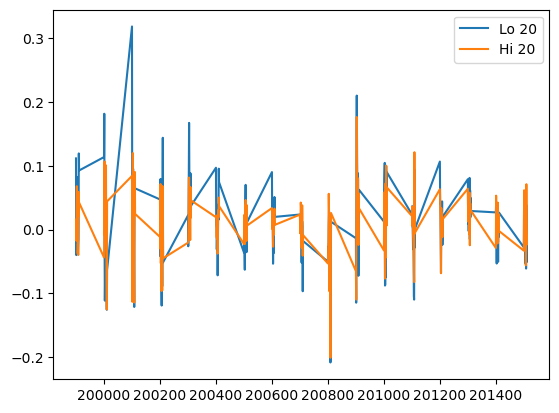

In [144]:
returns.plot()

<Axes: >

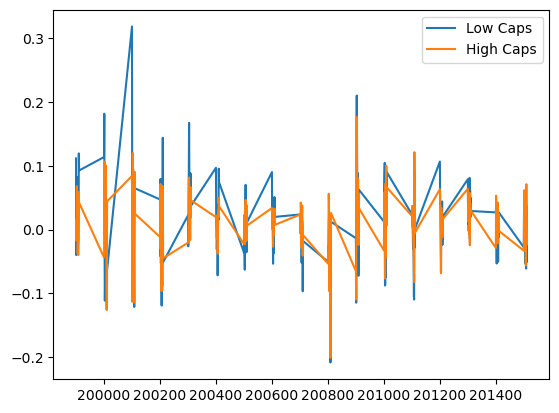

In [145]:
returns.columns = ["Low Caps","High Caps"]
returns.plot()

In [146]:
month_return = (returns+1).prod()**(1/len(returns)) - 1
month_return

Low Caps     0.009069
High Caps    0.005094
dtype: float64

In [147]:
annualized_return = (month_return+1)**12 - 1
annualized_return

Low Caps     0.114426
High Caps    0.062865
dtype: float64

In [148]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

Low Caps     0.228894
High Caps    0.172713
dtype: float64

In [149]:
annualized_return/annualized_vol

Low Caps     0.499909
High Caps    0.363985
dtype: float64

In [150]:
rf = 0.03
sharpe_ratio = (annualized_return - rf)/annualized_vol
sharpe_ratio

Low Caps     0.368844
High Caps    0.190287
dtype: float64

## Computing Maximum Drawdown.

/var/folders/cs/9h7p_scd025gkjlttrkq99100000gn/T/ipykernel_8646/3511380387.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_m = pd.read_csv("/Users/account/Downloads/Portfolio_contruction/data/Portfolios_Formed_on_ME_monthly_EW.csv",


<Axes: >

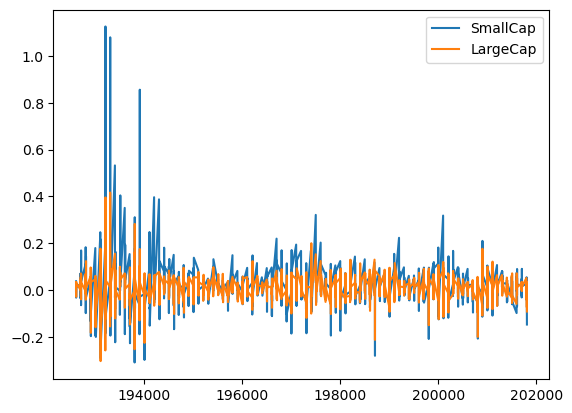

In [151]:
import pandas as pd

me_m = pd.read_csv("/Users/account/Downloads/Portfolio_contruction/data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 20', 'Hi 20']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

### Timeseries - forcing the index to be a datetime.

In [152]:
rets.index

Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702, 192703,
       192704,
       ...
       201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811,
       201812],
      dtype='int64', length=1110)

In [153]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [154]:
rets = rets.loc['1999':'2015']
rets

,SmallCap,LargeCap
1999-01-01,0.1114,0.0153
1999-02-01,-0.0399,-0.0172
1999-03-01,-0.0308,0.0368
1999-04-01,0.0824,0.0679
1999-05-01,0.0435,-0.0048
...,...,...
2015-08-01,-0.0347,-0.0559
2015-09-01,-0.0610,-0.0333
2015-10-01,0.0385,0.0710
2015-11-01,0.0165,0.0015


In [155]:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1999-01,0.1114,0.0153
1999-02,-0.0399,-0.0172
1999-03,-0.0308,0.0368
1999-04,0.0824,0.0679
1999-05,0.0435,-0.0048


In [156]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 204 entries, 1999-01 to 2015-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  204 non-null    float64
 1   LargeCap  204 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [157]:
rets.describe()

,SmallCap,LargeCap
count,204.000000,204.000000
mean,0.011204,0.006347
std,0.066076,0.049858
min,-0.208000,-0.200600
25%,-0.027975,-0.021550
50%,0.010450,0.009750
75%,0.047250,0.035100
max,0.317900,0.176200


### Computing Drawdowns.

1. Convert the time series of returns to a time series that represents a wealth index.
2. Compute the time series of the previous peaks.
3. Compute the Drawdown as the differences between the previous peak and the current value.

<Axes: >

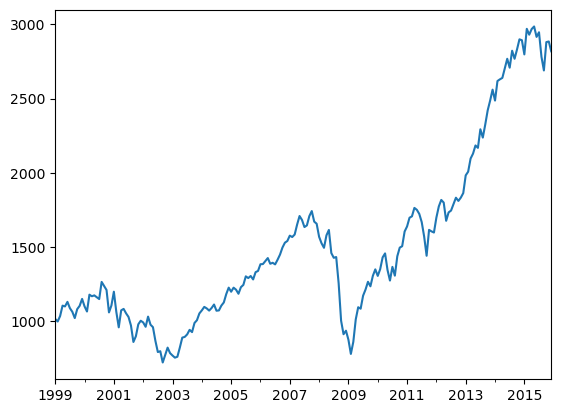

In [158]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()
wealth_index.plot()

<Axes: >

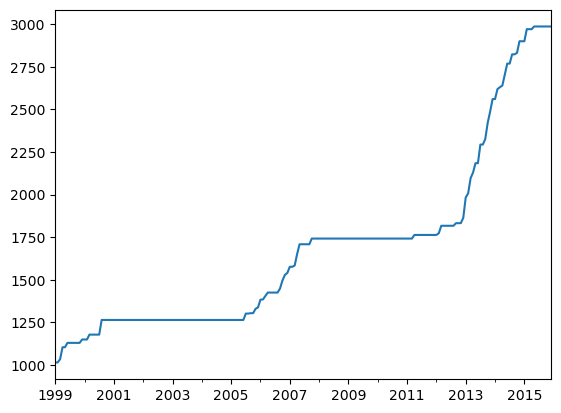

In [159]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

<Axes: >

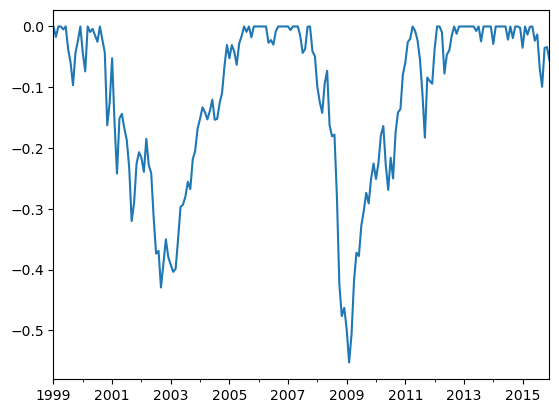

In [160]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [161]:
drawdown.min()

-0.5527349978713653

<Axes: >

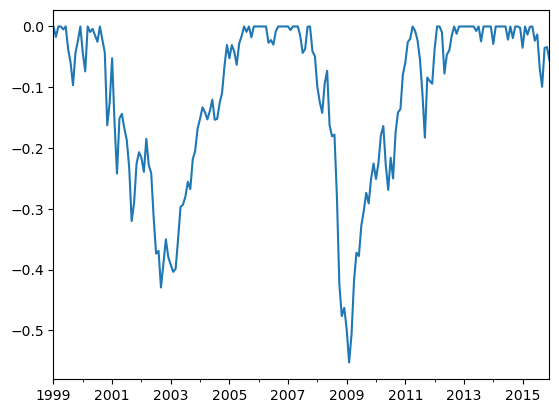

In [162]:
drawdown["1999":"2015"].plot()

In [163]:
drawdown["1999"].min()

-0.09669282940399998

# Build a model.

In [164]:
import pandas as pd

def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

def get_ffme_returns():
    """
    Load the Fama-French Dataset for the returns of the Top and Bottom Deciles by MarketCap
    """
    me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                       header=0, index_col=0, na_values=-99.99)
    rets = me_m[['Lo 10', 'Hi 10']]
    rets.columns = ['SmallCap', 'LargeCap']
    rets = rets/100
    rets.index = pd.to_datetime(rets.index, format="%Y%m").to_period('M')
    return rets

# Deviations from Normality.

Skewness and kurtosis even though these are already available in the scipy.stats module, and then we'll apply them to hedge fund index returns.

We'll also look at using scipy.stats module to apply the Jarque-Bera test for normality, and apply them to different return series.




In [165]:
def get_hfi_returns():
    """
    Load and format the EDHEC Hedge Fund Index Returns
    """
    hfi = pd.read_csv("/Users/account/Downloads/Portfolio_contruction/data/edhec-hedgefundindices.csv",
                      header=0, index_col=0, parse_dates=True)
    hfi = hfi/100
    hfi.index = hfi.index.to_period('M')
    return hfi

In [166]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import edhec_risk_kit_107 as erk
hfi = erk.get_hfi_returns()
hfi_2000 = hfi.loc["2000":]
hfi.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/account/Downloads/Portfolio_contruction/edhec_risk_kit_107.py:21: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv("data/edhec-hedgefundindices.csv",


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


## Skewness

Intuitively, a negative skew means that you get more negative returns than you would have expected if the returns were distributed like the normal distribution.

Another way of thinking about it is if that returns are normally distributed, the mean and the median would be very close.

However, if they are negatively skewed, the expected value i.e. the mean is less than the median. If they are positively skewed, the expected value (again, the mean) is greater than the median.

In [167]:
pd.concat([hfi.mean(), hfi.median(), hfi.mean()>hfi.median()], axis=1)

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


Now, let's develop the code to compute the skewness of a series of numbers.

Recall that the skewness is given by:

$$ S(R) = \frac{E[ (R-E(R))^3 ]}{\sigma_R^3} $$


In [168]:
def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [169]:
skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [170]:
import scipy.stats
scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

In [171]:
hfi.shape

(263, 13)

In [172]:
import numpy as np
normal_rets = np.random.normal(0, 0.15, (263, 1))

In [173]:
normal_rets.mean(), normal_rets.std()

(0.008169487028031637, 0.14378523814393823)

In [174]:
erk.skewness(normal_rets)

-0.003003028920641315

## Kurtosis

Intuitively, the kurtosis measures the "fatness" of the tails of the distribution. The normal distribution has a kurtosis of 3 and so if the kurtosis of your returns is less than 3 then it tends to have thinner tails, and if the kurtosis is greater than 3 then the distribution has fatter tails.

Kurtosis is given by:

$$ K(R) = \frac{E[ (R-E(R))^4 ]}{\sigma_R^4} $$

This is very similar to the skewness, so we can just copy and paste it and then edit it to compute the 4th rather than the 3rd power (as was the case for skewness).


In [175]:
erk.kurtosis(hfi_2000)

Convertible Arbitrage     23.001449
CTA Global                 2.845022
Distressed Securities      6.231720
Emerging Markets           5.941289
Equity Market Neutral     20.329621
Event Driven               5.543444
Fixed Income Arbitrage    33.378729
Global Macro               3.653278
Long/Short Equity          4.472589
Merger Arbitrage           4.520785
Relative Value            12.731096
Short Selling              4.352758
Funds Of Funds             7.584725
dtype: float64

In [176]:
scipy.stats.kurtosis(normal_rets)

array([0.34359825])

In [177]:
erk.kurtosis(normal_rets)

3.3435982499246815

## Running the Jarque-Bera Test for Normality

The `scipy.stats` module contains a function that runs the _Jarque-Bera_ test on a sequence of numbers. Let's apply that to the normally generated returns:

In [178]:
scipy.stats.jarque_bera(normal_rets)

SignificanceResult(statistic=1.2941334713163164, pvalue=0.5235793230715953)

In [179]:
scipy.stats.jarque_bera(hfi)

SignificanceResult(statistic=25656.585999171337, pvalue=0.0)

In [180]:
erk.is_normal(normal_rets)

True

In [181]:
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [182]:
import pandas as pd
isinstance(hfi, pd.DataFrame)

True

In [183]:
erk.is_normal(normal_rets)

True

## Testing CRSP SmallCap and Large Cap returns for Normality

Let's see whether any of the returns we've been studying so far pass the normality hypothesis.

In [184]:
ffme = erk.get_ffme_returns()
erk.skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [185]:
erk.kurtosis(ffme)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [186]:
erk.is_normal(ffme)

SmallCap    False
LargeCap    False
dtype: bool

# Downside Measures: SemiDeviation, VaR and CVaR.

In [187]:
def semideviation(r):
    is_neg = r < 0 #Returns the semideviation / negative semideviation of r
    return r[is_neg].std(ddof =0) # r must be a Series or a DataFrame, else raises a TypeError

In [188]:
import pandas as pd
import edhec_risk_kit_107 as erk
%load_ext autoreload
%autoreload
%matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using matplotlib backend: module://matplotlib_inline.backend_inline


In [189]:
hfi = erk.get_hfi_returns()

/Users/account/Downloads/Portfolio_contruction/edhec_risk_kit_107.py:21: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv("data/edhec-hedgefundindices.csv",


In [190]:
hfi_0918 = hfi.loc["2009":"2018"]

In [191]:
erk.semideviation(hfi_0918)

Convertible Arbitrage     0.006681
CTA Global                0.010996
Distressed Securities     0.009498
Emerging Markets          0.015276
Equity Market Neutral     0.005186
Event Driven              0.010135
Fixed Income Arbitrage    0.003321
Global Macro              0.005075
Long/Short Equity         0.012139
Merger Arbitrage          0.003611
Relative Value            0.005711
Short Selling             0.021240
Funds Of Funds            0.007948
dtype: float64

In [192]:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [193]:
erk.semideviation(hfi).sort_values()

Global Macro              0.006579
Merger Arbitrage          0.008875
Equity Market Neutral     0.009566
Funds Of Funds            0.012122
Relative Value            0.012244
CTA Global                0.012443
Long/Short Equity         0.014051
Distressed Securities     0.015185
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Convertible Arbitrage     0.019540
Short Selling             0.027283
Emerging Markets          0.028039
dtype: float64

In [194]:
ffme = erk.get_ffme_returns()
erk.semideviation(ffme)

SmallCap    0.051772
LargeCap    0.040245
dtype: float64

## VaR and CVaR

We'll look at three different ways to compute Value At Risk

1. Historic VaR
2. Parametric Gaussian VaR
3. Modified (Cornish-Fisher) VaR

To compute the historic VaR at a certain level, say 5%, all we have to do is to find the number such that 5% of the returns fall below that number and 95% of the returns fall above that number. In other words, we want the 5 percentile return.

Fortunately, numpy has a `np.percentile` function that computes exactly that.

Add the following code to the `edhec_risk_kit.py` file:

```python

def var_historic(r, level=5):
    """
    Returns the historic Value at Risk at a specified level
    i.e. returns the number such that "level" percent of the returns
    fall below that number, and the (100-level) percent are above
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")        
```

In [195]:
import numpy as np
np.percentile(hfi, q=50)

0.0058

In [196]:
erk.var_historic(hfi, level=1)

Convertible Arbitrage     0.031776
CTA Global                0.049542
Distressed Securities     0.046654
Emerging Markets          0.088466
Equity Market Neutral     0.018000
Event Driven              0.048612
Fixed Income Arbitrage    0.041672
Global Macro              0.024316
Long/Short Equity         0.049558
Merger Arbitrage          0.025336
Relative Value            0.026660
Short Selling             0.113576
Funds Of Funds            0.039664
dtype: float64

## Conditional VaR aka Beyond VaR

Now that we have the VaR, the CVaR is very easy. All we need is to find the mean of the numbers that fell below the VaR!

In [197]:
erk.cvar_historic(hfi, level=1).sort_values()

Global Macro              0.029333
Equity Market Neutral     0.036100
Merger Arbitrage          0.036233
Relative Value            0.052367
CTA Global                0.054767
Funds Of Funds            0.061133
Long/Short Equity         0.061867
Distressed Securities     0.070967
Event Driven              0.071267
Fixed Income Arbitrage    0.072467
Convertible Arbitrage     0.086100
Short Selling             0.123867
Emerging Markets          0.141167
dtype: float64

In [198]:
erk.cvar_historic(ffme)

SmallCap    0.162609
LargeCap    0.121277
dtype: float64

## Parametric Gaussian VaR

The idea behind this is very simple. If a set of returns is normally distributed, we know, for instance, that 50% of the returns are below the mean and 50% are above.

We also know that approx two thirds of the returns lie within 1 standard deviation. That means one third lie beyond one standard deviation from the mean. Since the normal distribution is symmetric, approximately one sixth (approx 16%) lie below one standard deviation away from the mean. Therefore, if we know the mean and standard deviation and if we assume that the returns are normally distributed, the 16% VaR would be the mean minus one standard deviation.

In general we can always convert a percentile point to a z-score (which is the number of standard deviations away from the mean that a number is). Therefore, if we can convert the VaR level (such as 1% or 5%) to a z-score, we can calculate the return level where that percent of returns lie below it.

`scipy.stat.norm` contains a function `ppf()` which does exactly that. It takes a percentile such as 0.05 or 0.01 and gives you the z-score corresponding to that in the normal distribution.

In [199]:
from scipy.stats import norm
norm.ppf(.5)

0.0

In [200]:
norm.ppf(.16)

-0.9944578832097531

Therefore, all we need to do to estimate the VaR using this method is to find the z-score corresponding to percentile level, and then add that many standard deviations to the mean, to obtain the VaR.

```python
from scipy.stats import norm
def var_gaussian(r, level=5):
    """
    Returns the Parametric Gauusian VaR of a Series or DataFrame
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    return -(r.mean() + z*r.std(ddof=0))
```

In [201]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [202]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

## Cornish-Fisher Modification

The Cornish-Fisher modification is an elegant and simple adjustment.

The z-score tells us how many standard deviations away from the mean we need to go to find the VaR. If the returns arent normal, we know that z-score will give us an inaccurate number. The basic idea is that since we can observe the skewness and kurtosis of the data, we can adjust the z-score up or down to come up with a modifed z-score. e.g. intuitively, all other things being equal, if the skewness is negative, we'll decrease the z-score further down, and if the skewness is positive, we'll push it up.

The adjusted z-score which we'll call $z_{cornishfisher}$ given by:

$$ z_{cornishfisher} = z +\frac{1}{6}(z^2-1)S + \frac{1}{24}(z^3-3z)(K-3)-\frac{1}{36}(2z^3-5z)S^2 $$


We can modify the previous function by adding a "modified" parameter with a default value of `True` as follows. If `True` then the following piece of code is executed, which modifes `z`:

```python
    if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )
```

The rewritten function is:

```python
from scipy.stats import norm
def var_gaussian(r, level=5, modified=False):
    """
    Returns the Parametric Gauusian VaR of a Series or DataFrame
    If "modified" is True, then the modified VaR is returned,
    using the Cornish-Fisher modification
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )
        
    return -(r.mean() + z*r.std(ddof=0))

```

We can now compare the different methods:

<Axes: title={'center': 'Hedge Fund Indices: VaR at 5%'}>

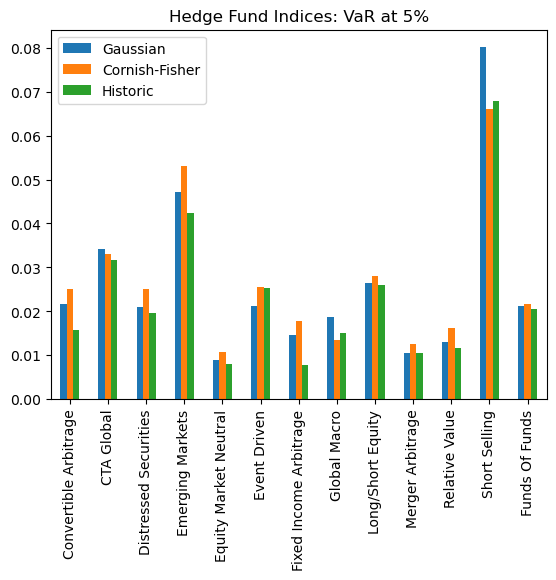

In [203]:
var_table = [erk.var_gaussian(hfi), 
             erk.var_gaussian(hfi, modified=True), 
             erk.var_historic(hfi)]
comparison = pd.concat(var_table, axis=1)
comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic']
comparison.plot.bar(title="Hedge Fund Indices: VaR at 5%")